WeatherPy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#build base url and query url

base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = base_url+f"appid={weather_api_key}&q=city"

#print(base_url)

#print(query_url)



In [28]:
#lists to hold data from api requests

name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_long = []
city_maxtemp = []
city_windspeed = []

# set counters
count = 1
group_counter = 1

print(f" --- Beginning Data Retrieval --- ")

for city in cities:

   
    query_url = base_url+f"units=imperial&appid={weather_api_key}&q={city}"
    city_data_response = requests.get(query_url)
    city_data = city_data_response.json()
    
        
    try:
         
        name.append(city_data["name"])
        city_cloudiness.append(city_data["clouds"]["all"])
        city_country.append(city_data["sys"]["country"])
        city_date.append(city_data["dt"])
        city_humidity.append(city_data["main"]["humidity"])
        city_lat.append(city_data["coord"]["lat"])
        city_long.append(city_data["coord"]["lon"])
        city_maxtemp.append(city_data["main"]["temp_max"])
        city_windspeed.append(city_data["wind"]["speed"])

        
        print(f"Processing record {count} of set {group_counter} | {city}")

        count += 1 
     
    except:
        print(f"City not found, skipping...")
        pass
   
    
    if count > 50:
        count = 1
        group_counter += 1
        
        
print(f" --- Data Retrieval Complete --- ")

 --- Beginning Data Retrieval --- 
Processing record 1 of set 1 | ancud
Processing record 2 of set 1 | komsomolskiy
Processing record 3 of set 1 | arraial do cabo
Processing record 4 of set 1 | hilo
Processing record 5 of set 1 | cheyenne
Processing record 6 of set 1 | hirara
Processing record 7 of set 1 | san quintin
Processing record 8 of set 1 | nikolskoye
City not found, skipping...
Processing record 9 of set 1 | zhigansk
City not found, skipping...
Processing record 10 of set 1 | tasiilaq
Processing record 11 of set 1 | pouebo
Processing record 12 of set 1 | saint george
Processing record 13 of set 1 | rikitea
Processing record 14 of set 1 | vaini
Processing record 15 of set 1 | bluff
Processing record 16 of set 1 | dikson
City not found, skipping...
Processing record 17 of set 1 | lexington park
Processing record 18 of set 1 | albany
Processing record 19 of set 1 | ushuaia
Processing record 20 of set 1 | kapaa
Processing record 21 of set 1 | kalmunai
City not found, skipping...
P

Processing record 38 of set 4 | zyryanka
Processing record 39 of set 4 | kyzyl-suu
Processing record 40 of set 4 | norman wells
Processing record 41 of set 4 | bartica
Processing record 42 of set 4 | beringovskiy
Processing record 43 of set 4 | college
Processing record 44 of set 4 | pangnirtung
Processing record 45 of set 4 | ostrovnoy
Processing record 46 of set 4 | port-gentil
Processing record 47 of set 4 | ligayan
Processing record 48 of set 4 | zigong
Processing record 49 of set 4 | thompson
Processing record 50 of set 4 | narsaq
Processing record 1 of set 5 | adre
Processing record 2 of set 5 | pullman
Processing record 3 of set 5 | ariquemes
City not found, skipping...
Processing record 4 of set 5 | saint-philippe
Processing record 5 of set 5 | preobrazheniye
City not found, skipping...
Processing record 6 of set 5 | kilembe
Processing record 7 of set 5 | cockburn town
Processing record 8 of set 5 | grand gaube
Processing record 9 of set 5 | pollachi
Processing record 10 of set

Processing record 27 of set 8 | uchiza
Processing record 28 of set 8 | okhotsk
Processing record 29 of set 8 | ulladulla
Processing record 30 of set 8 | kailua
Processing record 31 of set 8 | paso de los toros
City not found, skipping...
Processing record 32 of set 8 | gusau
Processing record 33 of set 8 | gilbues
Processing record 34 of set 8 | puerto madryn
Processing record 35 of set 8 | barcelos
Processing record 36 of set 8 | nemuro
City not found, skipping...
Processing record 37 of set 8 | dauphin
Processing record 38 of set 8 | pizarro
Processing record 39 of set 8 | duluth
Processing record 40 of set 8 | souillac
Processing record 41 of set 8 | pangai
City not found, skipping...
Processing record 42 of set 8 | rio gallegos
Processing record 43 of set 8 | ayan
City not found, skipping...
Processing record 44 of set 8 | harper
Processing record 45 of set 8 | mizan teferi
Processing record 46 of set 8 | dzhebariki-khaya
Processing record 47 of set 8 | grand-santi
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data_df = {
    "City": name,
    "Country": city_country,
    "Lat": city_lat,
    "Lng": city_long,
    "Max Temp": city_maxtemp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloudiness,
    "Wind Speed":city_windspeed,
    "Date": city_date
            }

city_data_df = pd.DataFrame(city_data_df)
city_data_df.head()



,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ancud,CL,-41.8697,-73.8203,51.01,100,90,3.44,1618445435
1,Yangi Marg`ilon,UZ,40.4272,71.7189,53.60,76,100,4.00,1618445435
2,Arraial do Cabo,BR,-22.9661,-42.0278,69.80,83,40,2.30,1618445436
3,Hilo,US,19.7297,-155.0900,80.60,57,20,12.66,1618445782
4,Cheyenne,US,41.1400,-104.8203,26.60,93,90,13.80,1618445637


In [14]:


#city_data_df.to_csv(r'city_data.csv', index=False, header=True)



In [6]:
city_data_df = pd.read_csv("../city_data.csv")
city_data_df = pd.DataFrame(city_data_df)
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Ancud,CL,-41.8697,-73.8203,51.01,100,90,3.44,1618445435
1,Yangi Marg`ilon,UZ,40.4272,71.7189,53.60,76,100,4.00,1618445435
2,Arraial do Cabo,BR,-22.9661,-42.0278,69.80,83,40,2.30,1618445436
3,Hilo,US,19.7297,-155.0900,80.60,57,20,12.66,1618445782
4,Cheyenne,US,41.1400,-104.8203,26.60,93,90,13.80,1618445637


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_df.loc[city_data_df["Humidity"] >100]["City"].count()

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

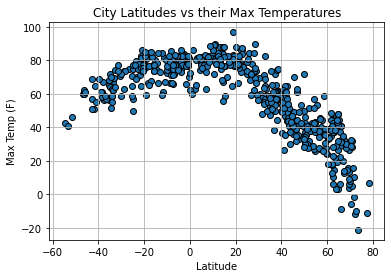

This figure plots the latitudes of all 596 cities against their respective max temperatures.
The data points reflect a curve that reaches its peak (i.e. max temps) close to the equator (latitude of 0).


In [34]:
x_values = city_lat
y_values = city_maxtemp

plt.title("City Latitudes vs their Max Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.scatter(x_values, y_values, marker= "o", edgecolor="black")
plt.savefig("../Images/latvstemp.png")
plt.show()

print(f"This figure plots the latitudes of all 596 cities against their respective max temperatures.")
print(f"The data points reflect a curve that reaches its peak (i.e. max temps) close to the equator (latitude of 0).")

## Latitude vs. Humidity Plot

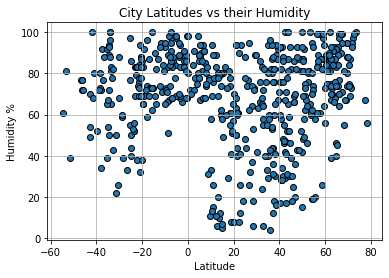

Humidity % among the cities seems to be concentrated in the range of 60-100%.
The cities in this range are distributed somewhat evenly between -60 and 80 degrees latitude.


In [33]:
x_values = city_lat
y_values = city_humidity

plt.title("City Latitudes vs their Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(x_values, y_values, marker= "o", edgecolor="black")
plt.savefig("../Images/latvshumidity.png")
plt.show()

print(f"Humidity % among the cities seems to be concentrated in the range of 60-100%.")
print(f"The cities in this range are distributed somewhat evenly between -60 and 80 degrees latitude.")

## Latitude vs. Cloudiness Plot

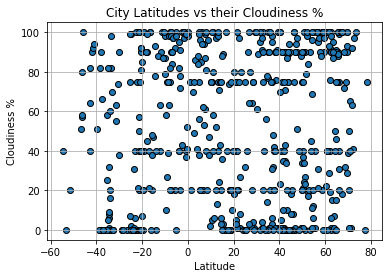

Cloudiness % is scattered somewhat evenly from 0 - 100% however there appears to be clusters of cities on both extremes.
Latitude does not appear to have any correlation with a cities cloudiness.


In [32]:
x_values = city_lat
y_values = city_cloudiness

plt.title("City Latitudes vs their Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(x_values, y_values, marker= "o", edgecolor="black")
plt.savefig("../Images/latvsclouds.png")
plt.show()

print(f"Cloudiness % is scattered somewhat evenly from 0 - 100% however there appears to be clusters of cities on both extremes.")
print(f"Latitude does not appear to have any correlation with a cities cloudiness.")

## Latitude vs. Wind Speed Plot

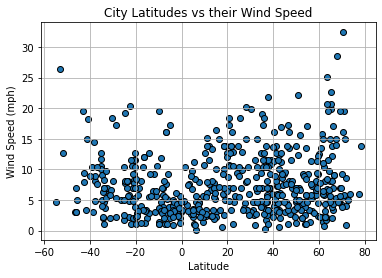

The max windspeeds are primarily clustered below 15mph, with a fairly even distribution of cities across -60 to 80 degrees latitude.


In [31]:
x_values = city_lat
y_values = city_windspeed

plt.title("City Latitudes vs their Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(x_values, y_values, marker= "o", edgecolor="black")
plt.savefig("../Images/latvswind.png")
plt.show()

print(f"The max windspeeds are primarily clustered below 15mph, with a fairly even distribution of cities across -60 to 80 degrees latitude.")

## Linear Regression

In [28]:
# separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]

#northern_hemisphere
#southern_hemisphere

#northern_hemisphere.dtypes
#southern_hemisphere.dtypes

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

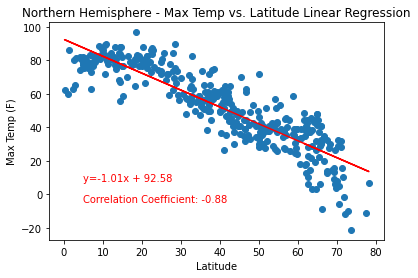

The correlation coefficient of -0.88 supports the strong negative relationship shown in the scatterplot between max temp and latitude.
As latitude increases in the northern hemisphere, the max temp decreases in a predictable manner across all cities.


In [35]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(regress_label, (5,8), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (5,-5), fontsize=10, color='red')

plt.savefig("../Images/north_latvstemp_regression.png")
plt.show()

print(f"The correlation coefficient of -0.88 supports the strong negative relationship shown in the scatterplot between max temp and latitude.")
print(f"As latitude increases in the northern hemisphere, the max temp decreases in a predictable manner across all cities.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

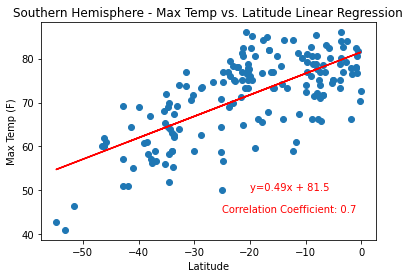

The correlation coefficient of 0.7 supports the strong positive relationship shown in the scatterplot between max temp and latitude.
As latitude increases in the southern hemisphere, the max temp increases in a predictable manner across all cities.


In [36]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(regress_label, (-20,50), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (-25,45), fontsize=10, color='red')

plt.savefig("../Images/south_latvstemp_regression.png")
plt.show()

print(f"The correlation coefficient of 0.7 supports the strong positive relationship shown in the scatterplot between max temp and latitude.")
print(f"As latitude increases in the southern hemisphere, the max temp increases in a predictable manner across all cities.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

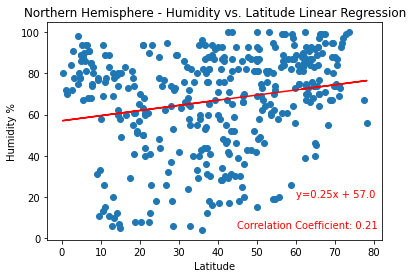

The correlation coefficient of 0.21 reflects a weak positive relationship between humidity % and increasing latitude.
That said, the data points reflect a concentrated, yet relatively even distribution of humidity % between 50-100% across the range of latitudes in the northern hemisphere.


In [38]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.annotate(regress_label, (60, 20), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (45,5), fontsize=10, color='red')

plt.savefig("../Images/north_latvshumidity_regression.png")
plt.show()

print(f"The correlation coefficient of 0.21 reflects a weak positive relationship between humidity % and increasing latitude.")
print(f"That said, the data points reflect a concentrated, yet relatively even distribution of humidity % between 50-100% across the range of latitudes in the northern hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

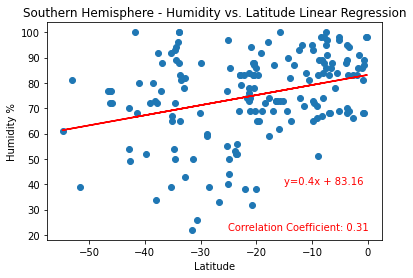

Similar to the north, the correlation coefficient of 0.31 in the southern hemispher reflects a weak positive relationship between humidity % and increasing latitude.
The data points reflect the majority of cities having at least 50% humidity, which increases somewhat predictably as you get closer to the equator.


In [40]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.annotate(regress_label, (-15, 40), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (-25, 22), fontsize=10, color='red')

plt.savefig("../Images/south_latvshumidity_regression.png")
plt.show()

print(f"Similar to the north, the correlation coefficient of 0.31 in the southern hemispher reflects a weak positive relationship between humidity % and increasing latitude.")
print(f"The data points reflect the majority of cities having at least 50% humidity, which increases somewhat predictably as you get closer to the equator.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

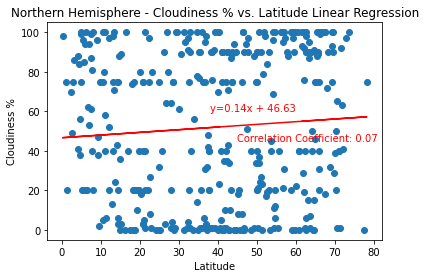

The linear regression supports the assumption made above that % cloudiness is almost unpredictable in the northern hemisphere across the range of latitudes.


In [41]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.annotate(regress_label, (38, 60), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (45, 45), fontsize=10, color='red')

plt.savefig("../Images/north_latvsclouds_regression.png")
plt.show()

print(f"The linear regression supports the assumption made above that % cloudiness is almost unpredictable in the northern hemisphere across the range of latitudes.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

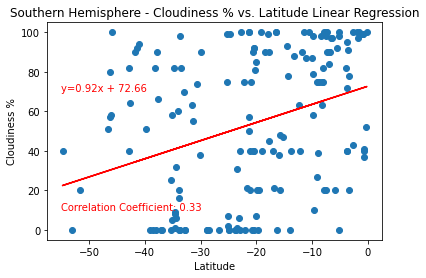

In the southern hemisphere there is a weak positive relationship between cloudiness % and latitude.
This is reflected in the 0.33 correlation coefficient.
Given the weak relationship, further analysis is warranted if this is an important factor.


In [42]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.annotate(regress_label, (-55, 70), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (-55, 10), fontsize=10, color='red')

plt.savefig("../Images/south_latvsclouds_regression.png")
plt.show()

print(f"In the southern hemisphere there is a weak positive relationship between cloudiness % and latitude.")
print(f"This is reflected in the 0.33 correlation coefficient.")
print(f"Given the weak relationship, further analysis is warranted if this is an important factor.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

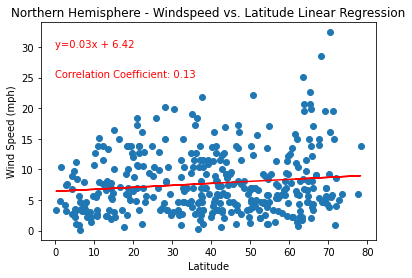

The linear regression reflects almost no correlation between wind speeds and latitude in the northern hemisphere.


In [43]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Northern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(regress_label, (0, 30), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (0, 25), fontsize=10, color='red')

plt.savefig("../Images/north_latvswind_regression.png")
plt.show()

print(f"The linear regression reflects almost no correlation between wind speeds and latitude in the northern hemisphere.")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

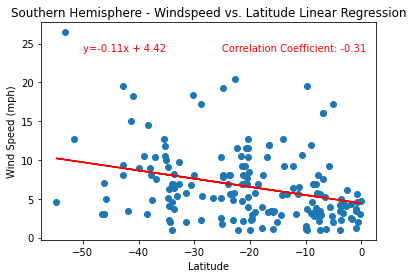

This regression points toward a weak negative relationship between a cities windspeed and its latitude.
Wind speed south of the equator is more predictable than north of the equator for this data set.


In [45]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Southern Hemisphere - Windspeed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(regress_label, (-50, 24), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (-25, 24), fontsize=10, color='red')

plt.savefig("../Images/south_latvswind_regression.png")
plt.show()

print(f"This regression points toward a weak negative relationship between a cities windspeed and its latitude.")
print(f"Wind speed south of the equator is more predictable than north of the equator for this data set.")